In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set()

In [2]:
# Load the dataset

insurance_df = pd.read_csv(r'C:\Users\AsRock\Downloads\insurance-data.csv')

In [3]:
# Display the first 3 rows of the dataset

insurance_df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [5]:
# Check the dataframe shape

insurance_df.shape

(1338, 7)

In [7]:
# Check the data dypes of the columns

insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
# Check for the null values

insurance_df.isna().apply(pd.value_counts)

# No missing values

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


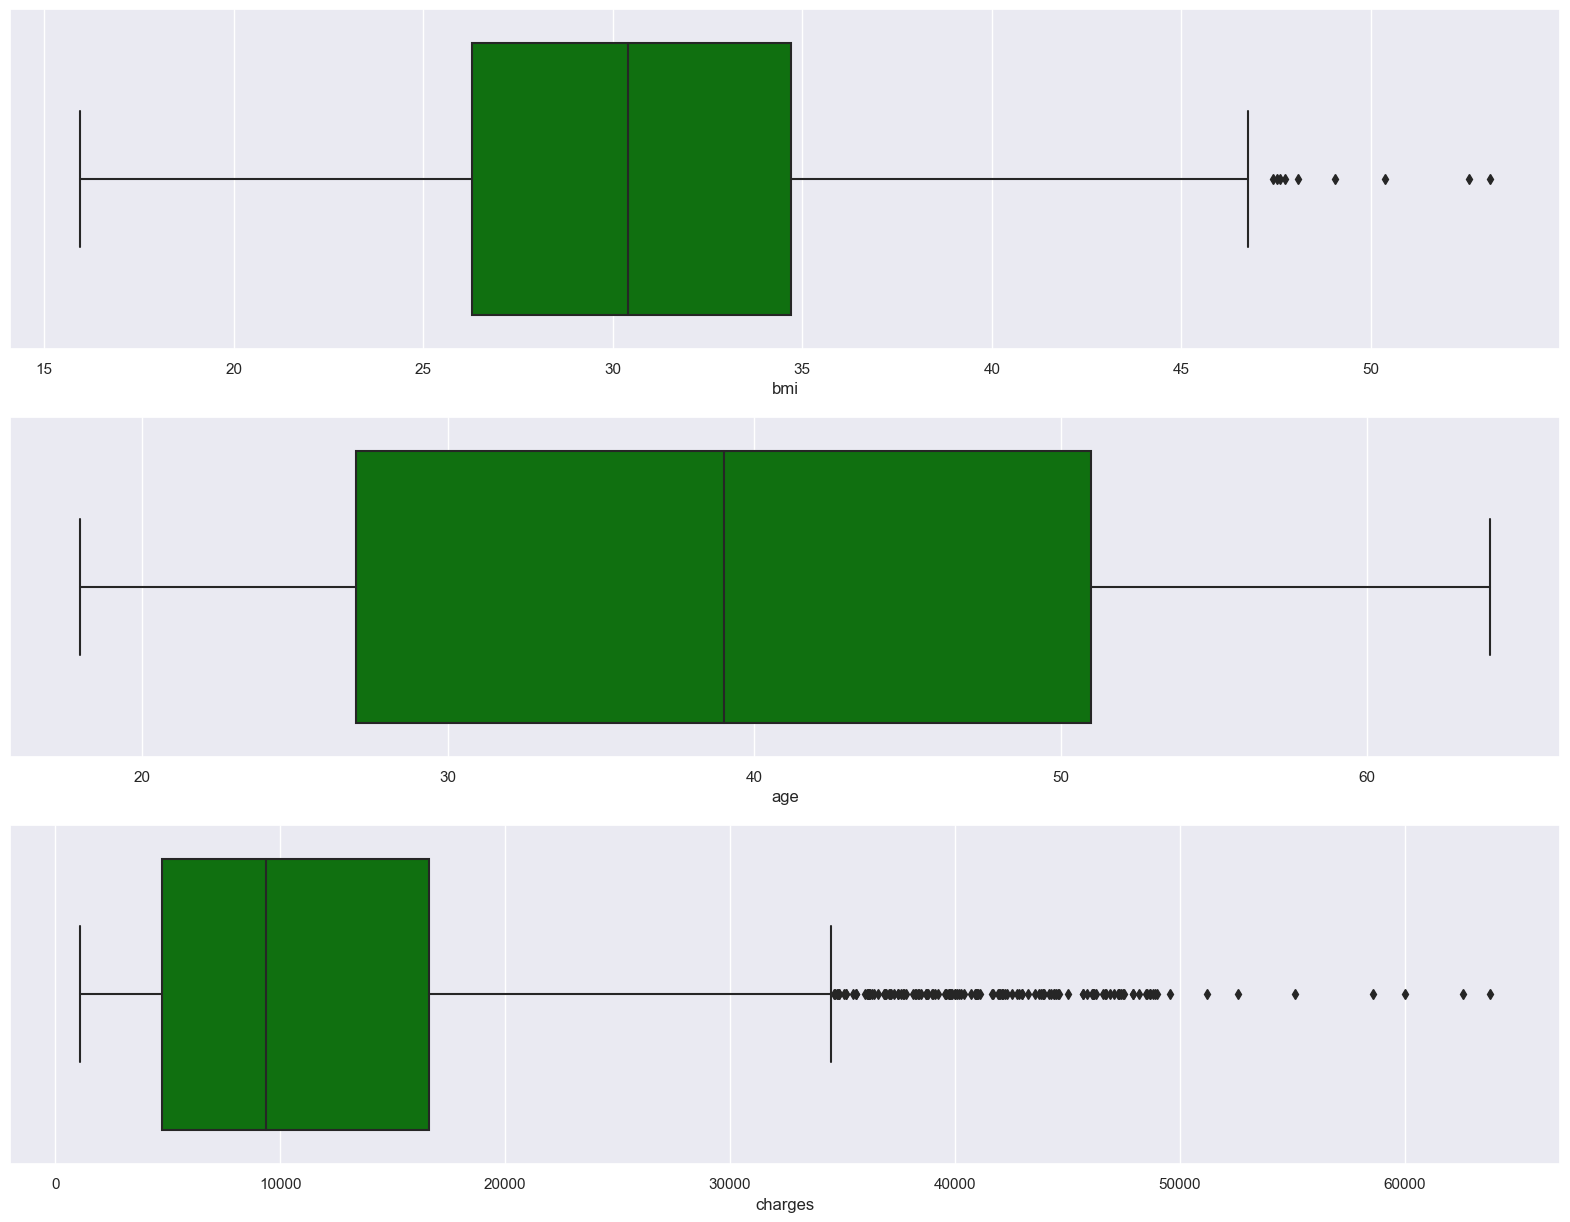

In [20]:
# Check for the outliers

plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.boxplot(x = insurance_df.bmi, color = "green")

plt.subplot(3,1,2)
sns.boxplot(x = insurance_df.age, color = "green")

plt.subplot(3,1,3)
sns.boxplot(x = insurance_df.charges, color = "green")

plt.show()

Results:
• BMI contains some extreme values.
• Charges are highly skewed, and a significant number of extreme values are present in the data.

In [22]:
# A brief summary for the dataset

insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


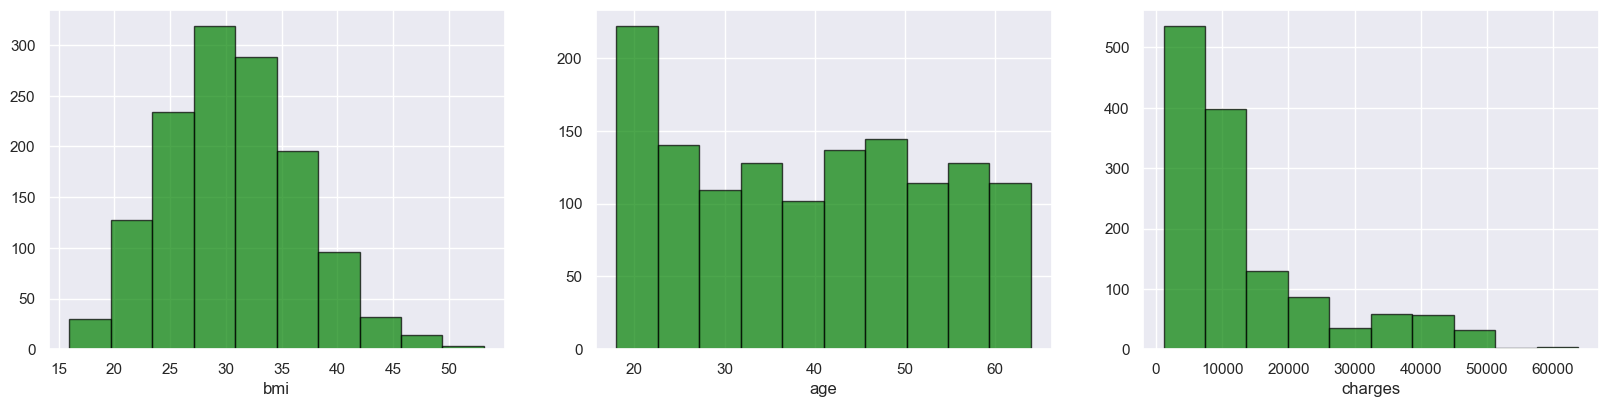

In [30]:
# Visualizations to examine the individual distributions of the continuous variables

plt.figure(figsize=(20, 15))

plt.subplot(3, 3, 1)
plt.hist(insurance_df["bmi"], color="green", edgecolor="black", alpha=0.7)
plt.xlabel("bmi")

plt.subplot(3, 3, 2)
plt.hist(insurance_df["age"], color="green", edgecolor="black", alpha=0.7)
plt.xlabel("age")

plt.subplot(3, 3, 3)
plt.hist(insurance_df["charges"], color="green", edgecolor="black", alpha=0.7)
plt.xlabel("charges")

plt.show()

In [31]:
# Show the skewness of variables

print("Skewness of BMI column:", insurance_df["bmi"].skew())
print("Skewness of age column:", insurance_df["age"].skew())
print("Skewness of charges column:", insurance_df["charges"].skew())


Skewness of BMI column: 0.2840471105987448
Skewness of age column: 0.05567251565299186
Skewness of charges column: 1.5158796580240388


Results:
• Skewness of BMI column is a relatively small amount of skewness, indicating that the distribution is close to being symmetric.
• Skewness of age means that the tail of the distribution is slightly longer on the positive side (i.e., towards older ages), but overall the distribution is relatively close to being symmetric.
• Skewness of charges indicates that the distribution of charges in the insurance_df dataframe is highly skewed. A highly skewed distribution like this can have implications for statistical analyses, as it may violate assumptions of normality and require special considerations.

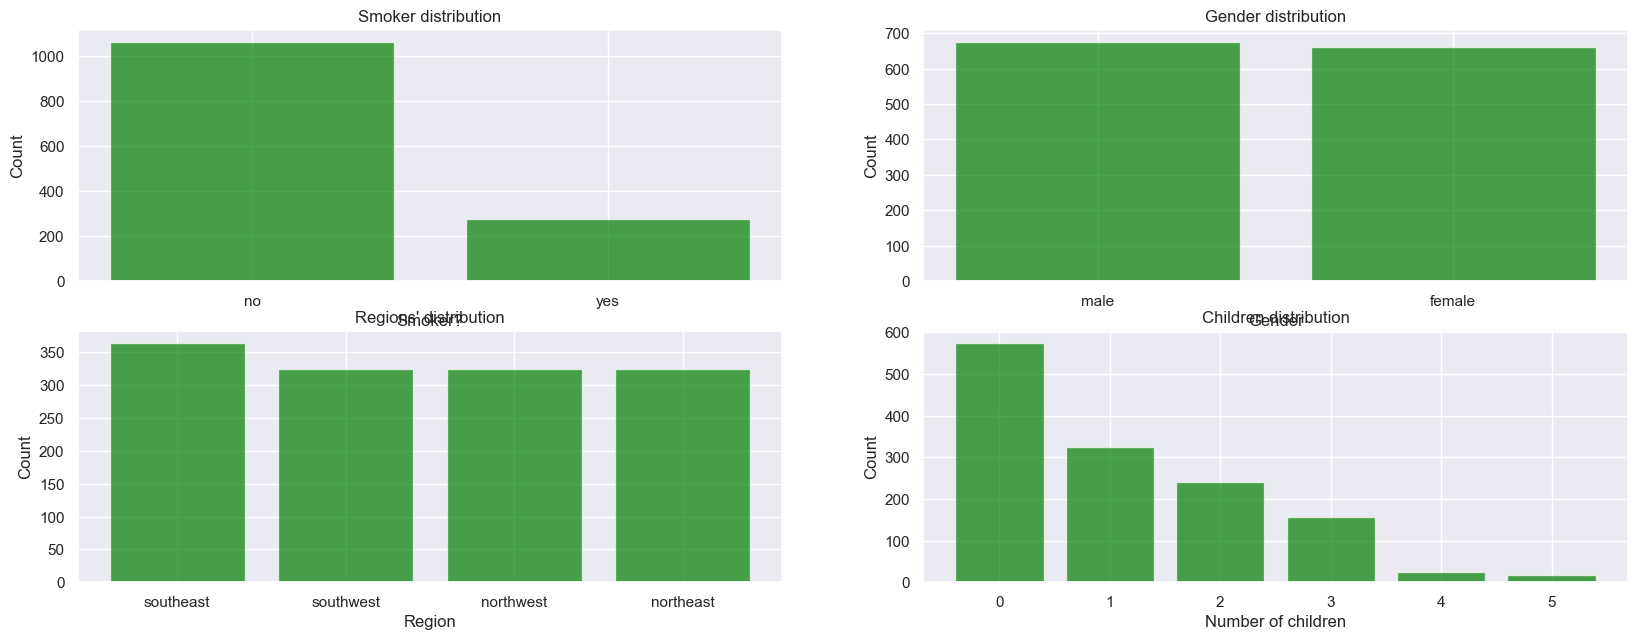

In [37]:
# Visualizin data to make analysis

plt.figure(figsize=(20, 15))

x = insurance_df.smoker.value_counts().index
y = [insurance_df["smoker"].value_counts()[i] for i in x]

plt.subplot(4,2,1)
plt.bar(x,y, align = "center", color = "green", alpha = 0.7)
plt.xlabel("Smoker?")
plt.ylabel("Count")
plt.title("Smoker distribution")

x1 = insurance_df.sex.value_counts().index
y1 = [insurance_df["sex"].value_counts()[j] for j in x1]

plt.subplot(4,2,2)
plt.bar(x1,y1, align = "center", color = "green", alpha = 0.7)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender distribution")

x2 = insurance_df.region.value_counts().index
y2 = [insurance_df["region"].value_counts()[k] for k in x2]

plt.subplot(4,2,3)
plt.bar(x2,y2, align = "center", color = "green", alpha = 0.7)
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Regions' distribution")

x3 = insurance_df.children.value_counts().index
y3 = [insurance_df["children"].value_counts()[m] for m in x3]

plt.subplot(4,2,4)
plt.bar(x3,y3, align = "center", color = "green", alpha = 0.7)
plt.xlabel("Number of children")
plt.ylabel("Count")
plt.title("Children distribution")

plt.show()


Results:
• The number of non-smokers is significantly higher than the number of smokers.
• Instances are uniformly distributed across all regions.
• The gender of the instances is evenly balanced.
• The majority of instances have less than three children, while only a small percentage have four or five children.

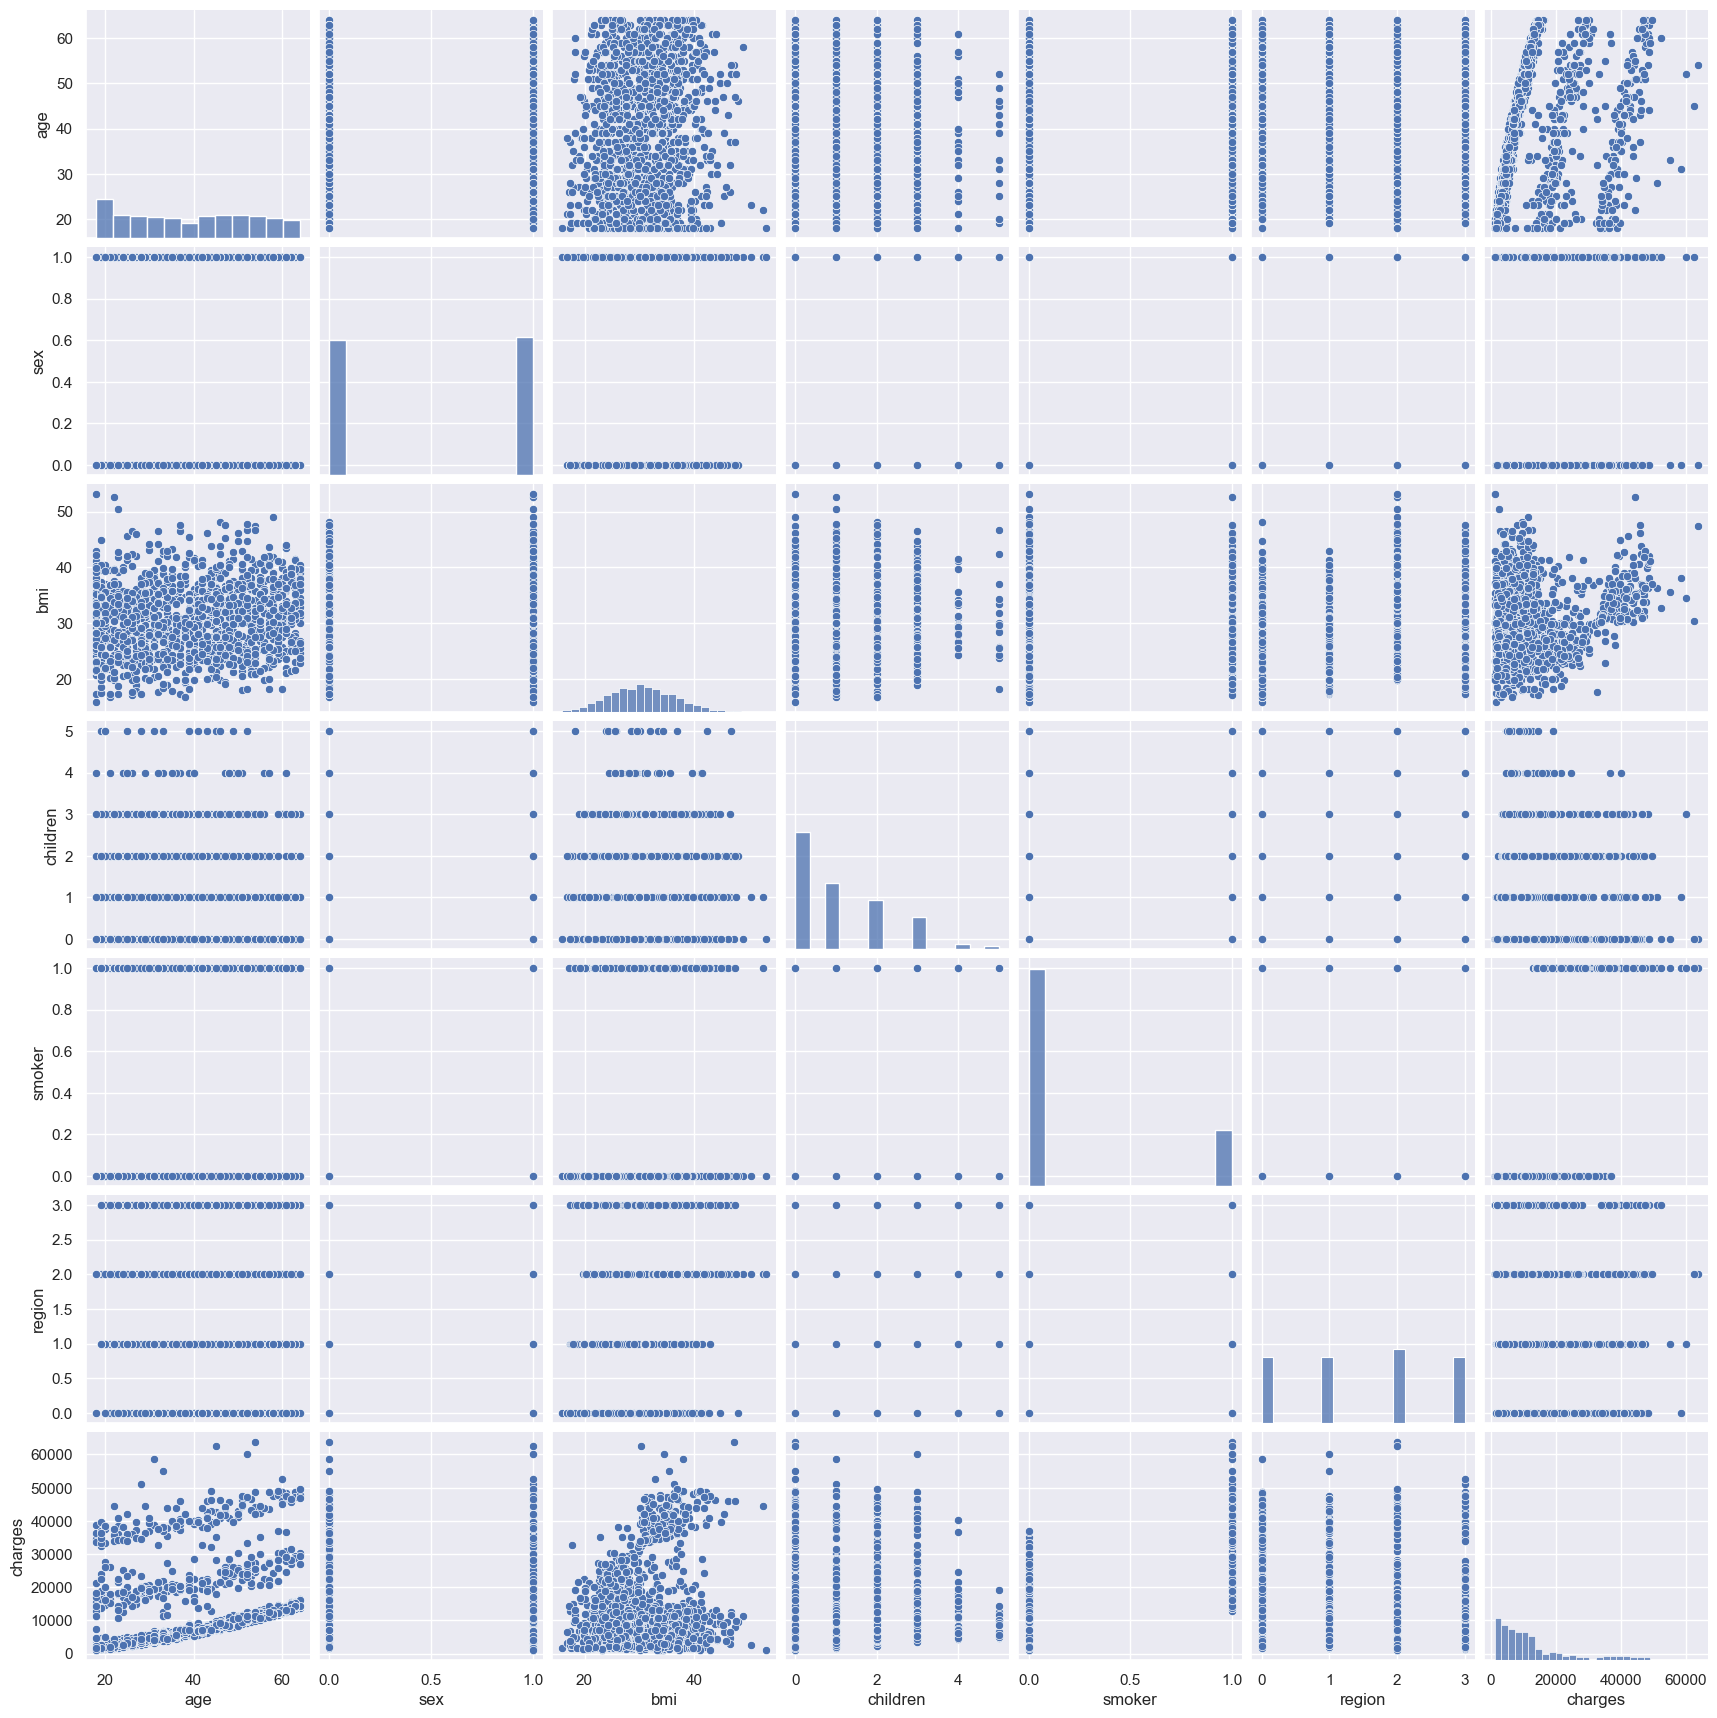

In [47]:
# Peform label encoding on the categorical columns and then create a pairplot. Label encoding involves transforming categorical data into numerical values, which could be achieved using LabelEncoder from the scikit-learn library.

from sklearn.preprocessing import LabelEncoder

insurance_df_encoded = insurance_df.copy()

le = LabelEncoder()
insurance_df_encoded["sex"] = le.fit_transform(insurance_df_encoded["sex"])
insurance_df_encoded["smoker"] = le.fit_transform(insurance_df_encoded["smoker"])
insurance_df_encoded["region"] = le.fit_transform(insurance_df_encoded["region"])

sns.pairplot(insurance_df_encoded)

plt.show()

Results:
• The data suggests that smokers tend to have higher medical expenses compared to non-smokers, indicating a correlation between smoking and medical costs.
• The data suggests that medical expenses tend to increase with age, indicating a possible pattern between age and healthcare costs. This pattern could be explored further to gain insights into the factors driving these charges and how they vary with age.

In [42]:
# Is there a significant difference in charges between smokers and non-smokers?

# Subset the data to include only smokers and non-smokers
smokers = insurance_df[insurance_df["smoker"] == "yes"]["charges"]
non_smokers = insurance_df[insurance_df["smoker"] == "no"]["charges"]

# Conduct a two-sample t-test to compare the mean charges of smokers and non-smokers
t_stat, p_val = stats.ttest_ind(smokers, non_smokers)

# Print the results of the t-test
print("Results of Two-Sample T-Test:")
print(f'T-Statistic: {t_stat:.3f}')
print(f'P-Value: {p_val:.3f}')

Results of Two-Sample T-Test:
T-Statistic: 46.665
P-Value: 0.000


Results:
• There is a significant difference in charges between smokers and non-smokers.
• The t-statistic of 46.665 indicates that the difference in means between the two groups is quite large, and the p-value of 0.000 is much smaller than a typical significance level of 0.05, providing strong evidence for rejecting the null hypothesis of no difference in means.

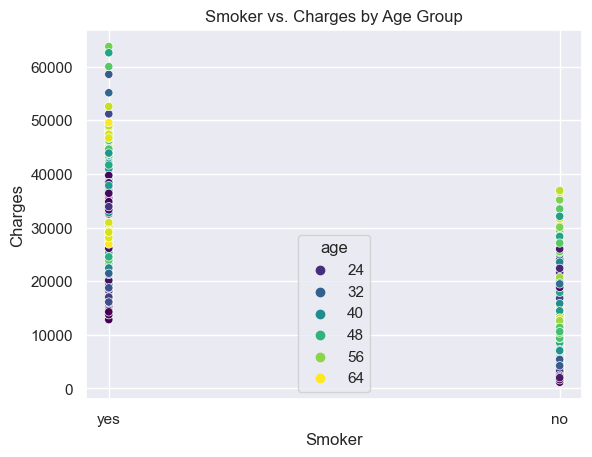

In [50]:
# A scatter plot can be used to visually examine the potential relationship between the "smoker" and "charges" attributes across different age groups.
# Create a scatter plot of smoker vs. charges, colored by age group
sns.scatterplot(data = insurance_df, x = "smoker", y = "charges", hue = "age", palette = "viridis")

# Add labels to the plot
plt.title("Smoker vs. Charges by Age Group")
plt.xlabel(" Smoker")
plt.ylabel("Charges")

# Display the plot
plt.show()

Results:
• There appears to be a positive relationship between "smoker" and "charges" attributes, with smokers generally having higher charges.
• The relationship is consistent across different age groups, with older individuals generally having higher charges than younger individuals.
